In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [60]:
#importing files

jan = pd.read_csv("202201-divvy-tripdata.csv")
feb = pd.read_csv("202202-divvy-tripdata.csv")
march = pd.read_csv("202203-divvy-tripdata.csv")
april = pd.read_csv("202204-divvy-tripdata.csv")
may = pd.read_csv("202205-divvy-tripdata.csv")
june =  pd.read_csv("202206-divvy-tripdata.csv")
july =  pd.read_csv("202207-divvy-tripdata.csv")
aug =  pd.read_csv("202208-divvy-tripdata.csv")
sep =  pd.read_csv("202209-divvy-tripdata.csv")
oct =  pd.read_csv("202210-divvy-tripdata.csv")
nov =  pd.read_csv("202211-divvy-tripdata.csv")
dec =  pd.read_csv("202212-divvy-tripdata.csv")

In [73]:
#Merging the files

all_dfs = [jan, feb, march, april, may, june, july, aug, sep, oct, nov, dec ]
case_file = pd.concat(all_dfs)
df = case_file

In [74]:
#Varifying mergerd Files 
case_file_5000 = df
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [78]:
# To get information about the dataframe.

case_file_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  start_time          datetime64[ns] 
 14  end_time            datetime64[ns] 
 15  ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(9), timedelta64[ns](1)
memory usage: 735.1+ MB


In [84]:
#To convert object data type of start_time and end_time columns into datetime data type

case_file_5000["start_time"] = pd.to_datetime(case_file_5000["started_at"])
case_file_5000["end_time"] = pd.to_datetime(case_file_5000["ended_at"])

In [85]:
#Adding new column - ride_length (ended_at - started_at) to calculate the time travelled

case_file_5000["ride_length"] = case_file_5000["end_time"] - case_file_5000["start_time"]
case_file_5000["ride_length"]


0        0 days 00:02:57
1        0 days 00:04:21
2        0 days 00:04:21
3        0 days 00:14:56
4        0 days 00:06:02
               ...      
181801   0 days 00:03:44
181802   0 days 00:12:59
181803   0 days 00:04:33
181804   0 days 00:03:56
181805   0 days 00:08:03
Name: ride_length, Length: 5667717, dtype: timedelta64[ns]

In [86]:
# Splitting and extracting the date from "started_at" column

case_file_5000["start_date1"] = [i.split(" ")[0] for i in case_file_5000["started_at"]]
case_file_5000["start_date1"]

0         2022-01-13
1         2022-01-10
2         2022-01-25
3         2022-01-04
4         2022-01-20
             ...    
181801    2022-12-05
181802    2022-12-14
181803    2022-12-08
181804    2022-12-28
181805    2022-12-09
Name: start_date1, Length: 5667717, dtype: object

In [87]:
# Converting start_date1 into datetime data type

case_file_5000["start_date1"] = pd.to_datetime(case_file_5000["start_date1"])

In [88]:
# Finding the weekday of the date

case_file_5000['week_day'] = case_file_5000["start_date1"].apply(lambda x: x.weekday())
case_file_5000['week_day'].unique()

array([3, 0, 1, 6, 5, 4, 2], dtype=int64)

In [89]:
# Converting weekday values into weekday
dict1 = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
case_file_5000['week_day'] = case_file_5000['week_day'].apply(lambda y: dict1[y])
case_file_5000['week_day']

0         Wednesday
1            Sunday
2            Monday
3            Monday
4         Wednesday
            ...    
181801       Sunday
181802      Tuesday
181803    Wednesday
181804      Tuesday
181805     Thursday
Name: week_day, Length: 5667717, dtype: object

In [90]:
# To sort the dataframe by start date in ascending order

case_file_5000.sort_values(by=['started_at'], inplace=True, ascending=True)

In [91]:
# Drop all rows with any NaN values

case_file_5000_cleaned = case_file_5000.dropna()

In [92]:
# To save the cleaned file for further transformation of data
case_file_5000_cleaned.to_csv('cleaned.csv')

In [93]:
# To import the cleaned data file
cleaned_file = pd.read_csv("cleaned.csv")

In [94]:
# Print the cleaned dataframe
cleaned_file

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_length,start_date1,week_day
0,73479,98D355D9A9852BE9,classic_bike,2022-01-01 00:00:05,2022-01-01 00:01:48,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,2022-01-01 00:00:05,2022-01-01 00:01:48,0 days 00:01:43,2022-01-01 00:00:00,Friday
1,68510,04706CA7F5BD25EE,electric_bike,2022-01-01 00:01:00,2022-01-01 00:04:39,Broadway & Waveland Ave,13325,Broadway & Barry Ave,13137,41.949073,-87.648633,41.937582,-87.644098,casual,2022-01-01 00:01:00,2022-01-01 00:04:39,0 days 00:03:39,2022-01-01 00:00:00,Friday
2,64490,42178E850B92597A,electric_bike,2022-01-01 00:01:16,2022-01-01 00:32:14,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,41.875919,-87.631194,41.875933,-87.630585,casual,2022-01-01 00:01:16,2022-01-01 00:32:14,0 days 00:30:58,2022-01-01 00:00:00,Friday
3,73485,6B93C46E8F5B114C,classic_bike,2022-01-01 00:02:14,2022-01-01 00:31:07,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,2022-01-01 00:02:14,2022-01-01 00:31:07,0 days 00:28:53,2022-01-01 00:00:00,Friday
4,73478,466943353EAC8022,classic_bike,2022-01-01 00:02:35,2022-01-01 00:31:04,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,2022-01-01 00:02:35,2022-01-01 00:31:04,0 days 00:28:29,2022-01-01 00:00:00,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369355,4140,78090C14B6003F5D,classic_bike,2022-12-31 23:57:18,2023-01-01 00:21:40,Wabash Ave & 9th St,TA1309000010,Clark St & Elm St,TA1307000039,41.870769,-87.625734,41.902973,-87.631280,member,2022-12-31 23:57:18,2023-01-01 00:21:40,0 days 00:24:22,2022-12-31 00:00:00,Friday
4369356,166964,207B82AF834747FD,electric_bike,2022-12-31 23:58:01,2023-01-01 00:06:40,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,Troy St & North Ave,15653,41.901250,-87.677353,41.909769,-87.705280,casual,2022-12-31 23:58:01,2023-01-01 00:06:40,0 days 00:08:39,2022-12-31 00:00:00,Friday
4369357,148852,390512AD1B791E95,classic_bike,2022-12-31 23:58:41,2023-01-01 00:16:53,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.867888,-87.623041,41.867888,-87.623041,casual,2022-12-31 23:58:41,2023-01-01 00:16:53,0 days 00:18:12,2022-12-31 00:00:00,Friday
4369358,148996,017486468322F08A,electric_bike,2022-12-31 23:59:01,2023-01-01 00:16:50,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.868109,-87.623071,41.867888,-87.623041,member,2022-12-31 23:59:01,2023-01-01 00:16:50,0 days 00:17:49,2022-12-31 00:00:00,Friday


In [95]:
# To calculate euclidean distance between start and end point.

cleaned_file["x"] = (cleaned_file["end_lat"] - cleaned_file["start_lat"])**2
cleaned_file["y"] = (cleaned_file["end_lng"] - cleaned_file["start_lng"])**2
cleaned_file["distance"] = (cleaned_file["x"] + cleaned_file["y"])**(1/2)
cleaned_file["distance"]

0          0.000000
1          0.012353
2          0.000609
3          0.000000
4          0.000000
             ...   
4369355    0.032678
4369356    0.029198
4369357    0.000000
4369358    0.000223
4369359    0.006754
Name: distance, Length: 4369360, dtype: float64

In [96]:
# To extract year and month from start date column

cleaned_file['year'] = pd.DatetimeIndex(cleaned_file["start_date1"]).year
cleaned_file['month'] = pd.DatetimeIndex(cleaned_file["start_date1"]).month

In [97]:
# To convert object datatype to timedelta
cleaned_file["ride_len"] = pd.to_timedelta(cleaned_file["ride_length"])

In [98]:
# Print the cleaned dataframe
cleaned_file

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_time,ride_length,start_date1,week_day,x,y,distance,year,month,ride_len
0,73479,98D355D9A9852BE9,classic_bike,2022-01-01 00:00:05,2022-01-01 00:01:48,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,...,2022-01-01 00:01:48,0 days 00:01:43,2022-01-01 00:00:00,Friday,0.000000e+00,0.000000e+00,0.000000,2022,1,0 days 00:01:43
1,68510,04706CA7F5BD25EE,electric_bike,2022-01-01 00:01:00,2022-01-01 00:04:39,Broadway & Waveland Ave,13325,Broadway & Barry Ave,13137,41.949073,...,2022-01-01 00:04:39,0 days 00:03:39,2022-01-01 00:00:00,Friday,1.320396e-04,2.056648e-05,0.012353,2022,1,0 days 00:03:39
2,64490,42178E850B92597A,electric_bike,2022-01-01 00:01:16,2022-01-01 00:32:14,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,41.875919,...,2022-01-01 00:32:14,0 days 00:30:58,2022-01-01 00:00:00,Friday,1.822185e-10,3.712438e-07,0.000609,2022,1,0 days 00:30:58
3,73485,6B93C46E8F5B114C,classic_bike,2022-01-01 00:02:14,2022-01-01 00:31:07,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,...,2022-01-01 00:31:07,0 days 00:28:53,2022-01-01 00:00:00,Friday,0.000000e+00,0.000000e+00,0.000000,2022,1,0 days 00:28:53
4,73478,466943353EAC8022,classic_bike,2022-01-01 00:02:35,2022-01-01 00:31:04,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,...,2022-01-01 00:31:04,0 days 00:28:29,2022-01-01 00:00:00,Friday,0.000000e+00,0.000000e+00,0.000000,2022,1,0 days 00:28:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369355,4140,78090C14B6003F5D,classic_bike,2022-12-31 23:57:18,2023-01-01 00:21:40,Wabash Ave & 9th St,TA1309000010,Clark St & Elm St,TA1307000039,41.870769,...,2023-01-01 00:21:40,0 days 00:24:22,2022-12-31 00:00:00,Friday,1.037098e-03,3.075812e-05,0.032678,2022,12,0 days 00:24:22
4369356,166964,207B82AF834747FD,electric_bike,2022-12-31 23:58:01,2023-01-01 00:06:40,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,Troy St & North Ave,15653,41.901250,...,2023-01-01 00:06:40,0 days 00:08:39,2022-12-31 00:00:00,Friday,7.257029e-05,7.799565e-04,0.029198,2022,12,0 days 00:08:39
4369357,148852,390512AD1B791E95,classic_bike,2022-12-31 23:58:41,2023-01-01 00:16:53,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.867888,...,2023-01-01 00:16:53,0 days 00:18:12,2022-12-31 00:00:00,Friday,0.000000e+00,0.000000e+00,0.000000,2022,12,0 days 00:18:12
4369358,148996,017486468322F08A,electric_bike,2022-12-31 23:59:01,2023-01-01 00:16:50,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.868109,...,2023-01-01 00:16:50,0 days 00:17:49,2022-12-31 00:00:00,Friday,4.899361e-08,9.044455e-10,0.000223,2022,12,0 days 00:17:49


In [99]:
# To check if there are null values in dataframe

cleaned_file.isnull().sum()

Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
start_time            0
end_time              0
ride_length           0
start_date1           0
week_day              0
x                     0
y                     0
distance              0
year                  0
month                 0
ride_len              0
dtype: int64

In [100]:
# To check if there are any duplicate values in dataframe

cleaned_file.duplicated().any()

False

***Analysis***

In [101]:
#To calculate mean of ride length of all types of users

mean_ride_length = cleaned_file["ride_len"].mean()
mean_ride_length

Timedelta('0 days 00:17:05.710490552')

In [102]:
# Calculate the max ride_length of all types of users

max_ride_length = cleaned_file["ride_len"].max()
max_ride_length

Timedelta('23 days 20:34:04')

In [103]:
# To calculate mean ride length for member

mean_ride_length_member = cleaned_file[cleaned_file["member_casual"] == "member"]
mean_ride_length_member = mean_ride_length_member["ride_len"].mean()
mean_ride_length_member

Timedelta('0 days 00:12:27.076499777')

In [104]:
# To calculate mean ride length for casual riders

mean_ride_length_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
mean_ride_length_casual = mean_ride_length_casual["ride_len"].mean()
mean_ride_length_casual

Timedelta('0 days 00:23:59.523224181')

In [105]:
# To calculate max ride length for member

max_ride_length_member = cleaned_file[cleaned_file["member_casual"] == "member"]
max_ride_length_member = max_ride_length_member["ride_len"].max()
max_ride_length_member

Timedelta('1 days 00:53:14')

In [106]:
# To calculate max ride length for casual riders

max_ride_length_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
max_ride_length_casual = max_ride_length_casual["ride_len"].max()
max_ride_length_casual

Timedelta('23 days 20:34:04')

In [107]:
# Calculate the mode of week_day for all types of users

mode_week_day = cleaned_file["week_day"].mode()
mode_week_day

0    Friday
dtype: object

In [108]:
# To calculate mode of week_day for member

mode_week_day_member = cleaned_file[cleaned_file["member_casual"] == "member"]
mode_week_day_member = mode_week_day_member["week_day"].mode()
mode_week_day_member

0    Wednesday
dtype: object

In [109]:
# To calculate mode of week_day for casual

mode_week_day_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
mode_week_day_casual = mode_week_day_casual["week_day"].mode()
mode_week_day_casual

0    Friday
dtype: object

In [110]:
# Calculate the number of rides for users by week_day by adding Count of ride_id to Values

dict1 = {"Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday": 6}
cleaned_file['week_day'] = cleaned_file['week_day'].apply(lambda y: dict1[y])

count_users_week_day = cleaned_file.groupby('week_day')['ride_id'].count()
count_users_week_day = count_users_week_day.sort_index()
count_users_week_day

week_day
0    585930
1    607639
2    616371
3    645897
4    608851
5    705623
6    599049
Name: ride_id, dtype: int64

In [111]:
# Calculate the number of rides for member by week_day by adding Count of ride_id to Values

count_member_week_day = cleaned_file[cleaned_file["member_casual"] == "member"].groupby('week_day')['ride_id'].count()
count_member_week_day

week_day
0    375171
1    411249
2    412795
3    415890
4    360054
5    338279
6    297733
Name: ride_id, dtype: int64

In [112]:
# Calculate the number of rides for casual by week_day by adding Count of ride_id to Values

count_casual_week_day = cleaned_file[cleaned_file["member_casual"] == "casual"].groupby('week_day')['ride_id'].count()
count_casual_week_day

week_day
0    210759
1    196390
2    203576
3    230007
4    248797
5    367344
6    301316
Name: ride_id, dtype: int64

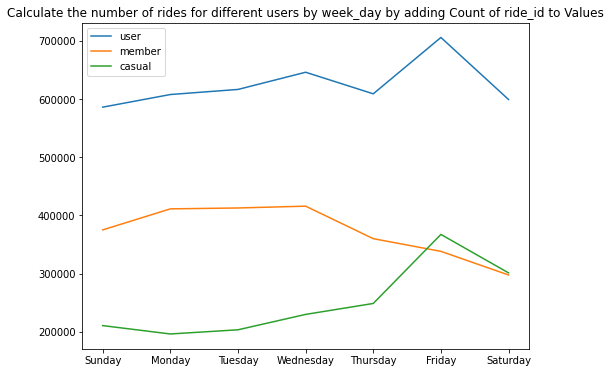

In [113]:
# To plot graph of Weekday Vs Number Of Rides

plt.figure(figsize = (8,6))
plt.plot(count_users_week_day.index, count_users_week_day.values)
plt.plot(count_member_week_day.index, count_member_week_day.values)
plt.plot(count_casual_week_day.index, count_casual_week_day.values)
plt.title("Calculate the number of rides for different users by week_day by adding Count of ride_id to Values")
plt.legend(["user", "member", "casual"])
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(count_casual_week_day.index, labels)
plt.show()

In [114]:
# Calculate the average ride_length for users by week_day

user_avg_ride_len_week_day = cleaned_file.groupby("week_day")['ride_len'].mean(numeric_only=False)
user_avg_ride_len_week_day

week_day
0   0 days 00:16:38.239607120
1   0 days 00:14:54.559707326
2   0 days 00:14:46.610176338
3   0 days 00:15:22.123868047
4   0 days 00:16:21.984989759
5   0 days 00:20:38.209171186
6   0 days 00:20:34.558835754
Name: ride_len, dtype: timedelta64[ns]

In [115]:
# Calculate the average ride_length for members by week_day

member_avg_ride_len_week_day = cleaned_file[cleaned_file["member_casual"] == "member"].groupby('week_day')['ride_len'].mean(numeric_only=False)
member_avg_ride_len_week_day

week_day
0   0 days 00:12:01.966143438
1   0 days 00:11:47.437165804
2   0 days 00:11:50.812592206
3   0 days 00:12:01.881560027
4   0 days 00:12:13.614349514
5   0 days 00:13:58.878227735
6   0 days 00:13:50.919075144
Name: ride_len, dtype: timedelta64[ns]

In [116]:
# Calculate the average ride_length for casual by week_day

casual_avg_ride_len_week_day = cleaned_file[cleaned_file["member_casual"] == "casual"].groupby('week_day')['ride_len'].mean(numeric_only=False)
casual_avg_ride_len_week_day

week_day
0   0 days 00:24:50.032563259
1   0 days 00:21:26.402255715
2   0 days 00:20:43.078344205
3   0 days 00:21:24.194472342
4   0 days 00:22:21.421970522
5   0 days 00:26:45.944242998
6   0 days 00:27:13.398847057
Name: ride_len, dtype: timedelta64[ns]

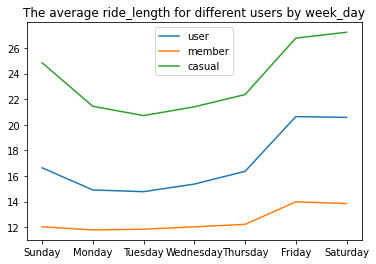

In [117]:
# To plot graph of Weekday Vs Average ride length

plt.plot(user_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(member_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(casual_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.title("The average ride_length for different users by week_day")
plt.legend(["user", "member", "casual"])
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(user_avg_ride_len_week_day.index, labels)
plt.show()

In [118]:
# To extract important features of the dataframe into a new dataframe
final_file = cleaned_file[["ride_id", "rideable_type", "ride_len", "week_day", "distance", "year", "month", "member_casual"]]

In [119]:
# To get the information of the dataframe
final_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369360 entries, 0 to 4369359
Data columns (total 8 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   ride_len       timedelta64[ns]
 3   week_day       int64          
 4   distance       float64        
 5   year           int64          
 6   month          int64          
 7   member_casual  object         
dtypes: float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 266.7+ MB


***Data Analysis***


In [120]:
# To check the number of users in each type over past 13 months

member_type = final_file["member_casual"].value_counts()
member_type

member    2611171
casual    1758189
Name: member_casual, dtype: int64

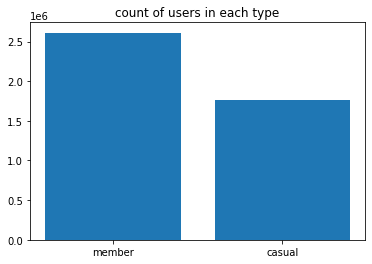

In [121]:
# To plot the count plot of users in each type

plt.title("count of users in each type")
plt.bar(member_type.index, member_type.values)
plt.show()

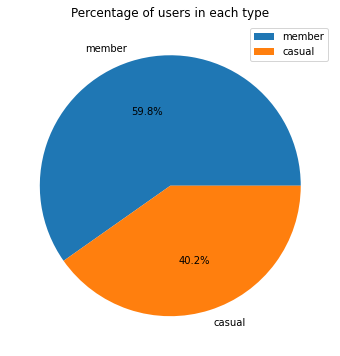

In [122]:
# To plot the pie chart of users in each type

plt.figure(figsize = (8,6))
plt.pie(member_type.values, labels = member_type.index, autopct='%1.1f%%')
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

In [123]:
# To check the number of users over years

users_over_year = final_file.groupby('year')['member_casual'].value_counts()
users_over_year

year  member_casual
2022  member           2611171
      casual           1758189
Name: member_casual, dtype: int64

In [124]:
# To segregate the number of users into member or casual riders over the years

list_year = []
list_x = []
list_y = list(users_over_year.values)
for i, j in users_over_year.index:
  list_x.append(j)
  list_year.append(str(i))

C:\Users\naeem\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Member and Casual Riders over the years')

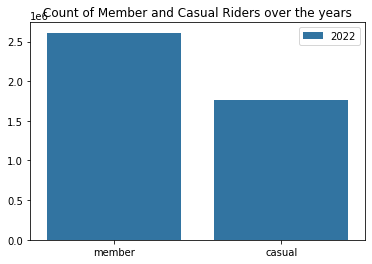

In [125]:
sns.barplot(list_x, list_y, hue = list_year)
plt.title("Count of Member and Casual Riders over the years")

In [126]:
# To check the number of users over months

users_over_month = final_file.groupby('month')['member_casual'].value_counts()
users_over_month

month  member_casual
1      member            67523
       casual            12605
2      member            74034
       casual            15144
3      member           148827
       casual            67156
4      member           180663
       casual            91897
5      member           282299
       casual           220246
6      member           328282
       casual           292068
7      member           331002
       casual           311678
8      member           335230
       casual           270095
9      member           314230
       casual           220915
10     member           262945
       casual           151324
11     member           182238
       casual            73556
12     member           103898
       casual            31505
Name: member_casual, dtype: int64

In [127]:
# To segregate the number of users into member or casual riders over the months

list_month = []
list_x = []
list_y = list(users_over_month.values)
for i, j in users_over_month.index:
  list_x.append(j)
  list_month.append(str(i))

C:\Users\naeem\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

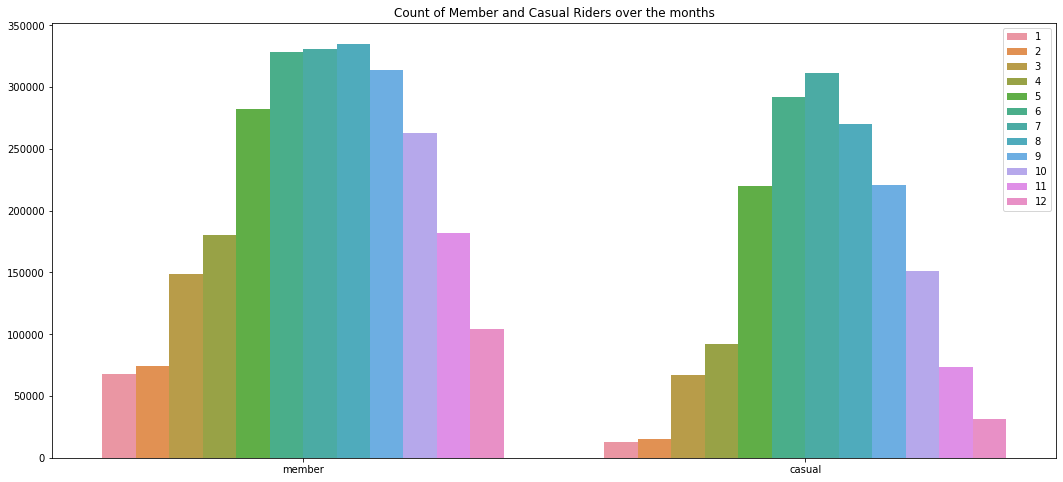

In [128]:
# Plot count of Member and Casual Riders over the months

plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_month)
plt.title("Count of Member and Casual Riders over the months")

In [129]:
# To check the number of users for a particulat rideable_type

ride_type = final_file.groupby("member_casual")["rideable_type"].value_counts()
ride_type

member_casual  rideable_type
casual         classic_bike      888780
               electric_bike     694551
               docked_bike       174858
member         classic_bike     1708646
               electric_bike     902525
Name: rideable_type, dtype: int64

In [130]:
# To segregate the number of users into member or casual riders based on ride type

list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
  list_x.append(j)
  list_member.append(str(i))

C:\Users\naeem\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

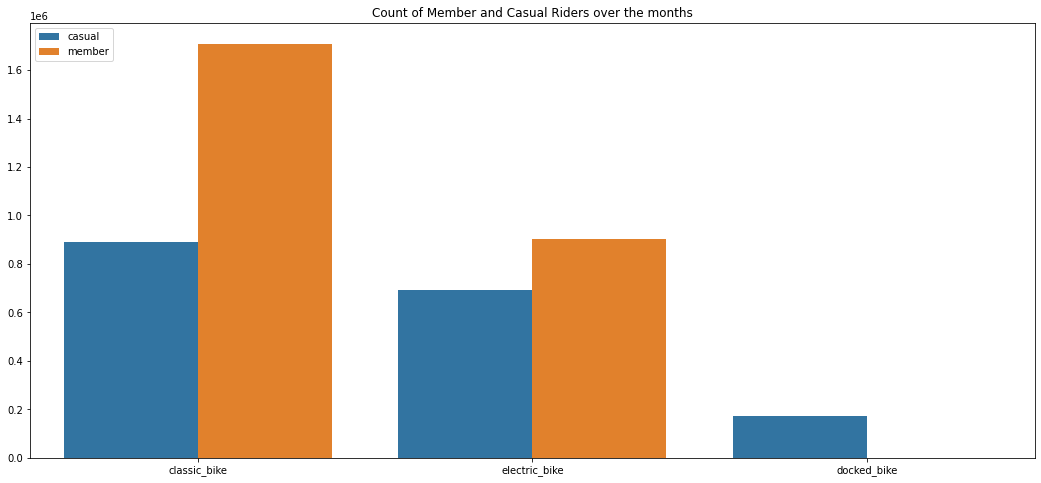

In [131]:
# To plot number of users into member or casual riders based on ride type

plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_member)
plt.title("Count of Member and Casual Riders over the months")